# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalization and Standardization

Original data (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


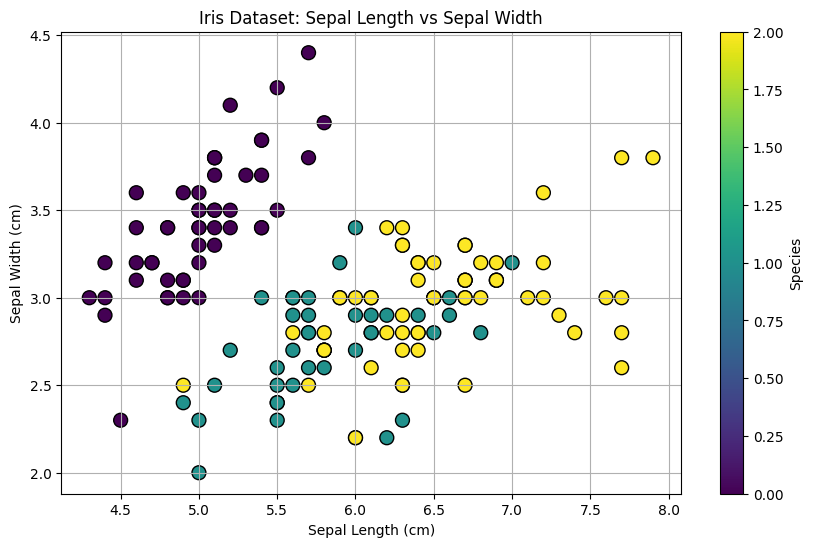

In [2]:
# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# We'll compare original, normalized, and standardized features
print("Original data (first 5 rows):")
print(X.head())

plt.figure(figsize=(10, 6))
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=iris.target, cmap='viridis', edgecolor='k', s=100)
plt.title('Iris Dataset: Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.colorbar(label='Species')
plt.grid()
plt.show()


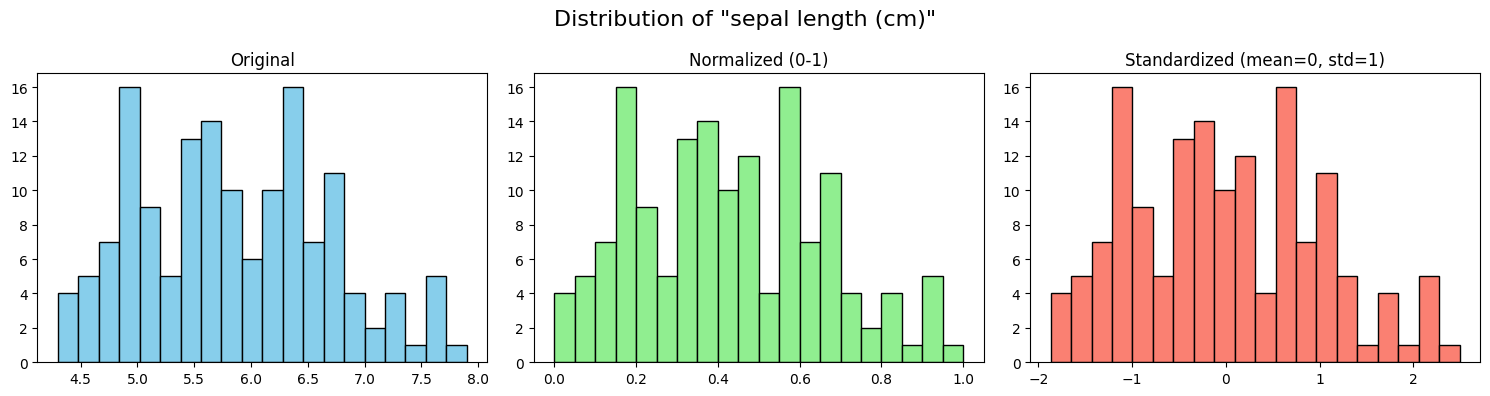

In [3]:
# ⚙️ Normalization: [0, 1]
minmax_scaler = MinMaxScaler().fit(X)
X_norm = pd.DataFrame(minmax_scaler.transform(X), columns=X.columns)

# ⚙️ Standardization: mean=0, std=1
std_scaler = StandardScaler().fit(X)
X_std = pd.DataFrame(std_scaler.transform(X), columns=X.columns)

# Plotting distributions for comparison
feature = 'sepal length (cm)'

plt.figure(figsize=(15, 4))

# Original
plt.subplot(1, 3, 1)
plt.hist(X[feature], bins=20, color='skyblue', edgecolor='black')
plt.title('Original')

# Normalized
plt.subplot(1, 3, 2)
plt.hist(X_norm[feature], bins=20, color='lightgreen', edgecolor='black')
plt.title('Normalized (0-1)')

# Standardized
plt.subplot(1, 3, 3)
plt.hist(X_std[feature], bins=20, color='salmon', edgecolor='black')
plt.title('Standardized (mean=0, std=1)')

plt.suptitle(f'Distribution of "{feature}"', fontsize=16)
plt.tight_layout()
plt.show()

## Ourliers in Normalization and Standardization

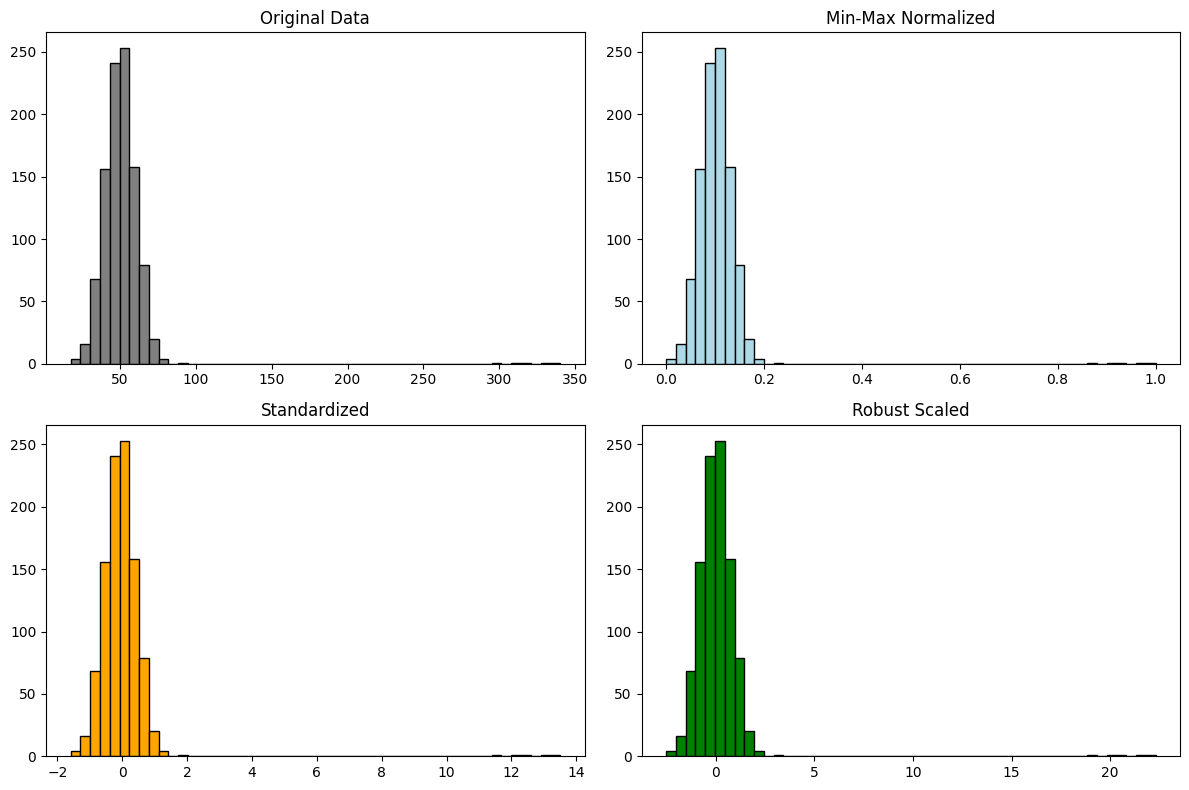

In [4]:
from sklearn.preprocessing import RobustScaler

# Generate synthetic data
np.random.seed(42)

# Generate 1000 values from a normal distribution (mean=50, std=10)
data = np.random.normal(loc=50, scale=10, size=(1000, 1))

# Add 5 extreme outliers
outliers = np.array([[300], [310], [320], [330], [340]])
data_with_outliers = np.vstack((data, outliers))

# Convert to DataFrame
df = pd.DataFrame(data_with_outliers, columns=["value"])

# Apply scalers
minmax = MinMaxScaler().fit(df[["value"]])
standard = StandardScaler().fit(df[["value"]])
robust = RobustScaler().fit(df[["value"]])

df["minmax"] = minmax.transform(df[["value"]])
df["standard"] = standard.transform(df[["value"]])
df["robust"] = robust.transform(df[["value"]])

# Plot all scalings
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Original data
axes[0, 0].hist(df["value"], bins=50, color='gray', edgecolor='black')
axes[0, 0].set_title("Original Data")

# Min-Max Scaling
axes[0, 1].hist(df["minmax"], bins=50, color='lightblue', edgecolor='black')
axes[0, 1].set_title("Min-Max Normalized")

# Standardization
axes[1, 0].hist(df["standard"], bins=50, color='orange', edgecolor='black')
axes[1, 0].set_title("Standardized")

# Robust Scaling
axes[1, 1].hist(df["robust"], bins=50, color='green', edgecolor='black')
axes[1, 1].set_title("Robust Scaled")

# Layout
plt.tight_layout()
plt.show()


## Example of Applying Normalizaction and Standardization in a ML model

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# 🔍 Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 🧪 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

breast_cancer_df = pd.DataFrame(data.data, columns=data.feature_names)
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
breast_cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:

# -----------------------------
# Logistic Regression WITHOUT scaling
# -----------------------------
model_no_scaling = LogisticRegression(max_iter=1000, penalty=None)
model_no_scaling.fit(X_train, y_train)
y_pred_ns = model_no_scaling.predict(X_test)
acc_ns = accuracy_score(y_test, y_pred_ns)

# -----------------------------
# Logistic Regression WITH StandardScaler in Pipeline
# -----------------------------
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, penalty=None))
])

pipeline.fit(X_train, y_train)
y_pred_scaled = pipeline.predict(X_test)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

# -----------------------------
# Logistic Regression WITH Normalization in Pipeline
# -----------------------------

pipeline = Pipeline([
    ("scaler", MinMaxScaler()),
    ("logreg", LogisticRegression(max_iter=1000, penalty=None))
])

pipeline.fit(X_train, y_train)
y_pred_norm = pipeline.predict(X_test)
acc_norm = accuracy_score(y_test, y_pred_norm)

# -----------------------------
# Compare results
# -----------------------------
print(f"Accuracy without standardization: {acc_ns:.4f}")
print(f"Accuracy with standardization:    {acc_scaled:.4f}")
print(f"Accuracy with normalization:    {acc_norm:.4f}")


Accuracy without standardization: 0.9561
Accuracy with standardization:    0.9386
Accuracy with normalization:    0.9123


/Users/adan.mora/Desktop/code/university/machine-learning-advance-course/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Class imbalance

Class distribution: Counter({np.int64(1): 2500, np.int64(4): 1000, np.int64(0): 650, np.int64(2): 500, np.int64(3): 350})


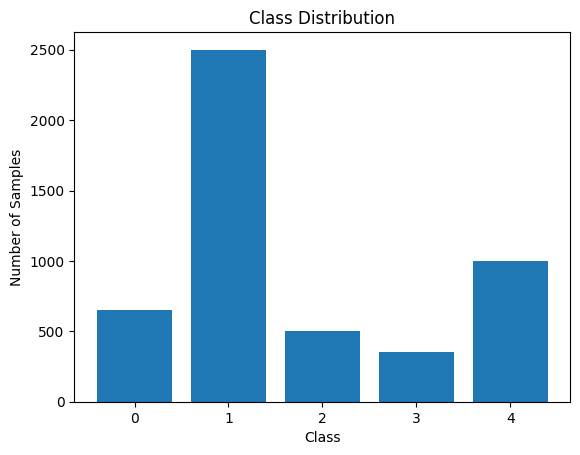

In [8]:
from sklearn.datasets import make_classification

from collections import Counter

# Generate synthetic dataset
X, y = make_classification(
    n_samples=5000,          # Total number of samples
    n_features=10,           # Number of features
    n_informative=5,        # Number of informative features
    n_redundant=2,           # Number of redundant features
    n_classes=5,            # Number of classes
    n_clusters_per_class=1,  # Clusters per class
    weights=[0.13, 0.5, 0.1, 0.07, 0.2],  # Imbalanced class weights
    flip_y=0,                # No label noise
    random_state=42          # Reproducibility
)

# Check class distribution
class_counts = Counter(y)
print("Class distribution:", class_counts)

# Visualize class distribution
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from collections import Counter

# Split the dataset without stratification
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(
    X, y, test_size=0.2, stratify=None
)

# Split the dataset with stratification
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X, y, test_size=0.2, stratify=y
)

# Function to calculate class distribution and percentages
def calculate_distribution(y_data):
    class_counts = Counter(y_data)
    total = sum(class_counts.values())
    percentages = {cls: (count / total) * 100 for cls, count in class_counts.items()}
    return pd.DataFrame({
        "Class": list(class_counts.keys()),
        "Count": list(class_counts.values()),
        "Percentage": list(percentages.values())
    }).sort_values(by="Class").reset_index(drop=True)

# Calculate distributions
df_train_ns = calculate_distribution(y_train_ns)
df_test_ns = calculate_distribution(y_test_ns)
df_train_s = calculate_distribution(y_train_s)
df_test_s = calculate_distribution(y_test_s)

# Combine results into a single DataFrame for comparison
comparison_df = pd.concat([
    df_train_ns.rename(columns={"Count": "Train Count (NS)", "Percentage": "Train % (NS)"}),
    df_test_ns.rename(columns={"Count": "Test Count (NS)", "Percentage": "Test % (NS)"}),
    df_train_s.rename(columns={"Count": "Train Count (S)", "Percentage": "Train % (S)"}),
    df_test_s.rename(columns={"Count": "Test Count (S)", "Percentage": "Test % (S)"})
], axis=1)

# Display the comparison DataFrame
print(comparison_df)

   Class  Train Count (NS)  Train % (NS)  Class  Test Count (NS)  Test % (NS)  \
0      0               514        12.850      0              136         13.6   
1      1              1990        49.750      1              510         51.0   
2      2               421        10.525      2               79          7.9   
3      3               283         7.075      3               67          6.7   
4      4               792        19.800      4              208         20.8   

   Class  Train Count (S)  Train % (S)  Class  Test Count (S)  Test % (S)  
0      0              520         13.0      0             130        13.0  
1      1             2000         50.0      1             500        50.0  
2      2              400         10.0      2             100        10.0  
3      3              280          7.0      3              70         7.0  
4      4              800         20.0      4             200        20.0  
